Training dataset size 990
Labels dataset size 990


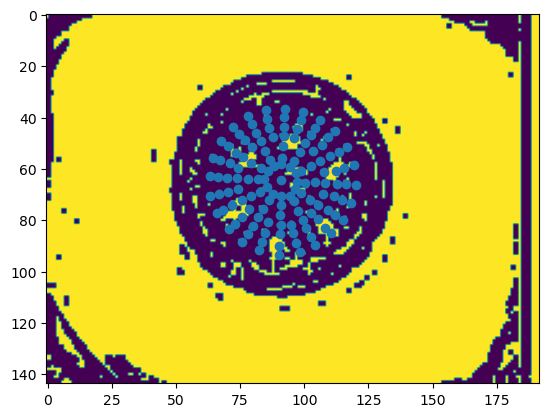

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2 
from sklearn import preprocessing
from sklearn.linear_model import Ridge

name="pickle_linear.pkl"
file="/its/home/drs25/Documents/GitHub/RoboSkin/Code/Models/TacTip reader/dots/" #"C:/Users/dexte/github/RoboSkin/Code/Models/TacTip reader/dots/"

#load dataset
y=np.load(file+"augmentedNewTacTip.npy")
X_train=np.load(file+"augmentedNewTacTipimages.npy")

DATASET_SIZE=300 #X_train.shape[0]
print("Training dataset size",len(X_train))
print("Labels dataset size",len(y))
#shape correctly
SIZE=0.3
y=y[0:DATASET_SIZE].reshape((y[0:DATASET_SIZE].shape[0],y[0:DATASET_SIZE].shape[1]*2))
y=y/(255)*SIZE
h=X_train.shape[2]*SIZE
w=X_train.shape[1]*SIZE
#this is the part to apply preprocessing
X_train_grayscale = np.zeros((DATASET_SIZE,int(w)*int(h))) # ((X_train.shape[0],int(h*w))) #((X_train.shape[0],144,192))
for i in range(DATASET_SIZE):
    im=X_train[i].copy()
    im=cv2.resize(im,(int(h),int(w)),interpolation=cv2.INTER_AREA)
    im = np.uint8(im)
    current = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #
    frame = cv2.adaptiveThreshold(
            current, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 1
        )
    kernel = np.ones((2, 2), np.uint8)
    frame = cv2.erode(frame, kernel, iterations=1)
    X_train_grayscale[i]=frame.flatten()/255 #remove flatten for conv


plt.imshow(cv2.resize(X_train_grayscale[0].reshape(144,192),(int(h),int(w)),interpolation=cv2.INTER_AREA))
example=(y[0].reshape((y[-1].shape[0]//2,2))*255)
plt.scatter(example[:,0],example[:,1])
#plt.show()
X, data_test, Y, labels_test = train_test_split(X_train_grayscale, y, test_size=0.20, random_state=42)

In [7]:
X.shape,y.shape

((240, 27648), (300, 266))

In [8]:
clf = Ridge(alpha=1.0)
clf.fit(X, Y)

Ridge()

In [47]:
h/SIZE

640.0

In [20]:
coords=clf.predict(data_test)
error=np.sum(np.sqrt(np.sum(np.square(coords-labels_test),axis=1)))



(27648,)


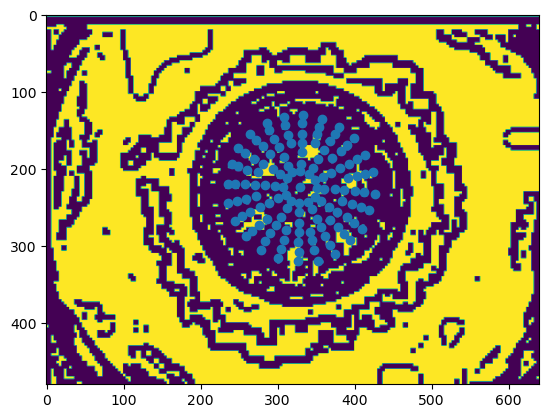

In [49]:
N=np.random.randint(0,50)
plt.imshow(cv2.resize(data_test[N].reshape(144,192),(int(h/SIZE),int(w/SIZE)),interpolation=cv2.INTER_AREA))
example=(coords[N].reshape((coords[N].shape[0]//2,2))*255)/SIZE
print(data_test[N].shape)
plt.scatter(example[:,0],example[:,1])

In [44]:
import pickle
pickle.dump(clf, open('/its/home/drs25/Documents/GitHub/RoboSkin/Code/Models/TacTip reader/pickle_imputer.pkl', 'wb'))